## COVID-19 predictive analysis

Jay Urbain, PhD



In [1]:
## Import Libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
#%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
plt.rcParams['figure.figsize'] = [15, 5]
from IPython import display
from ipywidgets import interact, widgets
import seaborn as sns



#### Data

The data is hosted by John Hopkins University:  
https://github.com/CSSEGISandData/COVID-19

There are three files that contain total confirmed cases, deaths and recoveries.

In [2]:
## Read Data for Cases, Deaths and Recoveries
df_confirmed_raw=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
df_deaths_raw=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
df_recovered_raw=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')


In [3]:
df_confirmed_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,50,50,53,59,70,75,82,114,147,177
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,502,511,581,639,639,701,773,839,825,878
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,150,150,160,178,178,200,212,226,243,266
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,99,117,129,149,149,197,238,428,566,673


Unpivot the data

In [4]:
# melt df into correct shape 
# index
def unpivot_data(df_raw):
    df_unpivot=df_raw.melt(id_vars=['Province/State','Country/Region','Lat','Long'], value_name='Cases', var_name='Date')
    df_unpivot['Date'] = pd.to_datetime(df_unpivot['Date'])
    df_unpivot=df_unpivot.set_index(['Date'])
    return df_unpivot 

# Unpivot datasets datasets
df_confirmed=unpivot_data(df_confirmed_raw)
df_deaths=unpivot_data(df_deaths_raw)
df_recovered=unpivot_data(df_recovered_raw)


In [5]:
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,Cases
Date,,,,,
2020-01-22,NaN,Thailand,15.0000,101.0000,2
2020-01-22,NaN,Japan,36.0000,138.0000,2
2020-01-22,NaN,Singapore,1.2833,103.8333,0
2020-01-22,NaN,Nepal,28.1667,84.2500,0
2020-01-22,NaN,Malaysia,2.5000,112.5000,0


In [6]:
df_deaths.head()

,Province/State,Country/Region,Lat,Long,Cases
Date,,,,,
2020-01-22,NaN,Thailand,15.0000,101.0000,0
2020-01-22,NaN,Japan,36.0000,138.0000,0
2020-01-22,NaN,Singapore,1.2833,103.8333,0
2020-01-22,NaN,Nepal,28.1667,84.2500,0
2020-01-22,NaN,Malaysia,2.5000,112.5000,0


In [7]:
df_recovered.head()

,Province/State,Country/Region,Lat,Long,Cases
Date,,,,,
2020-01-22,NaN,Thailand,15.0000,101.0000,0
2020-01-22,NaN,Japan,36.0000,138.0000,0
2020-01-22,NaN,Singapore,1.2833,103.8333,0
2020-01-22,NaN,Nepal,28.1667,84.2500,0
2020-01-22,NaN,Malaysia,2.5000,112.5000,0


List countries

In [8]:
np.sort(df_confirmed['Country/Region'].unique())

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cruise Ship', 'Cuba', 'Cyprus',
       'Czechia', 'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt',
       'Equatorial Guinea', 'Estonia', 'Eswatini', 'Ethiopia', 'Finland',
       'France', 'Gabon', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Greenland', 'Guatemala', 'Guernsey', 'Guinea', 'Guyana',
       'Holy See', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan

In [9]:
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,Cases
Date,,,,,
2020-01-22,NaN,Thailand,15.0000,101.0000,2
2020-01-22,NaN,Japan,36.0000,138.0000,2
2020-01-22,NaN,Singapore,1.2833,103.8333,0
2020-01-22,NaN,Nepal,28.1667,84.2500,0
2020-01-22,NaN,Malaysia,2.5000,112.5000,0


Cap date range to today to eliminate spurious data

In [10]:
from datetime import date
max_date = date.today()
max_date

datetime.date(2020, 3, 18)

In [11]:
df_confirmed.index.values.max(), df_confirmed.index.values.min()

(numpy.datetime64('2020-03-17T00:00:00.000000000'),
 numpy.datetime64('2020-01-22T00:00:00.000000000'))

In [12]:
min_date_string = np.datetime_as_string(df_confirmed.index.values.min(), unit='D')
max_date_string = np.datetime_as_string(df_confirmed.index.values.max(), unit='D')

In [13]:
%matplotlib inline

def plot_countries(df, countries, min_cases=50, ls='-', col='Cases'):
    for country in countries:
        df_country = df.loc[(df['Country/Region'] == country) & (df['Cases'] >= min_cases)]
#         df_country = df_country[:max_date]
        if len(df_country) == 0:
            continue
#         print(df_country.index.values.max())
        df_country.reset_index()[col].plot(label=country, ls=ls)

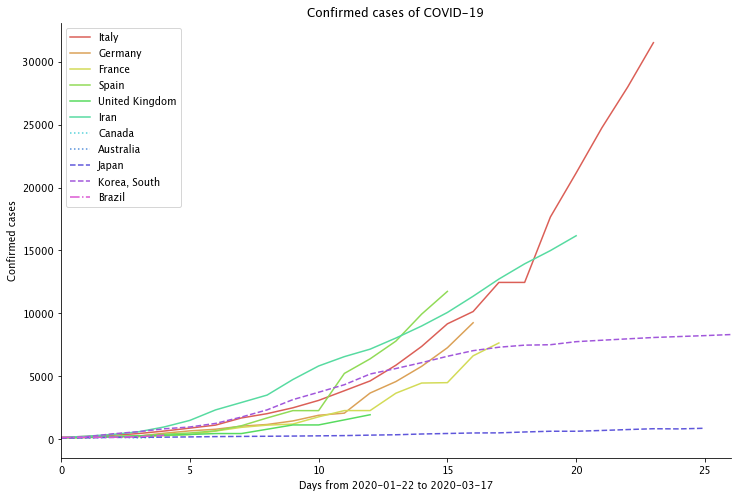

In [14]:
country_groups = [['Italy', 'Germany', 'France', 'Spain', 'United Kingdom', 'Iran'], 
                  ['Canada', 'Australia'], 
                  ['Japan', 'Korea, South'], 
                  ['Argentina', 'Brazil', 'Colombia', 'Mexico']]
line_styles = ['-', ':', '--', '-.']

sns.set_palette(sns.color_palette("hls", 12))
fig, ax = plt.subplots(figsize=(12, 8))

min_cases=100
for countries, ls in zip(country_groups, line_styles):
    plot_countries(df_confirmed, countries, min_cases=min_cases, ls=ls)

# x = np.linspace(0, plt.xlim()[1] - 1)
# ax.plot(x, 100 * (1.25) ** x, ls='--', color='k', label='25% daily growth')

ax.set(title='Confirmed cases of COVID-19',
       xlabel='Days from {} to {}'.format(min_date_string, max_date_string),
       ylabel='Confirmed cases')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.legend(loc=0)

sns.despine();

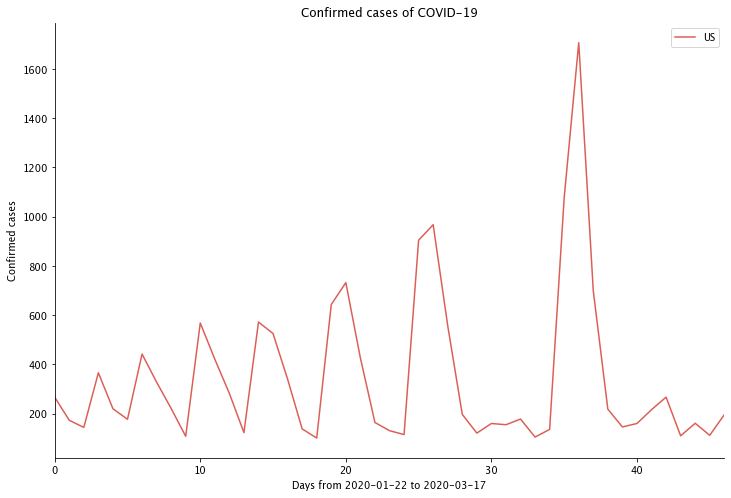

In [15]:
country_groups = [['US']]
line_styles = ['-', ':', '--', '-.']

sns.set_palette(sns.color_palette("hls", 12))
fig, ax = plt.subplots(figsize=(12, 8))

min_cases=100
for countries, ls in zip(country_groups, line_styles):
    plot_countries(df_confirmed, countries, min_cases=min_cases, ls=ls)

ax.set(title='Confirmed cases of COVID-19',
       xlabel='Days from {} to {}'.format(min_date_string, max_date_string),
       ylabel='Confirmed cases')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.legend(loc=0)
ax.legend(loc=0)

sns.despine();

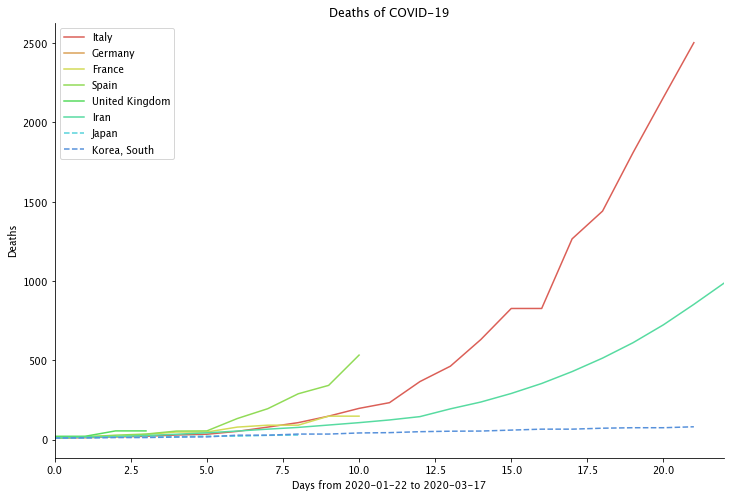

In [16]:
country_groups = [['Italy', 'Germany', 'France', 'Spain', 'United Kingdom', 'Iran'], 
                  ['Canada', 'Australia'], 
                  ['Japan', 'Korea, South'], 
                  ['Argentina', 'Brazil', 'Colombia', 'Mexico']]
line_styles = ['-', ':', '--', '-.']

sns.set_palette(sns.color_palette("hls", 12))
fig, ax = plt.subplots(figsize=(12, 8))

min_cases=10
for countries, ls in zip(country_groups, line_styles):
    plot_countries(df_deaths, countries, min_cases=min_cases, ls=ls)

ax.set(title='Deaths of COVID-19',
       xlabel='Days from {} to {}'.format(min_date_string, max_date_string),
       ylabel='Deaths')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.legend(loc=0)

sns.despine();

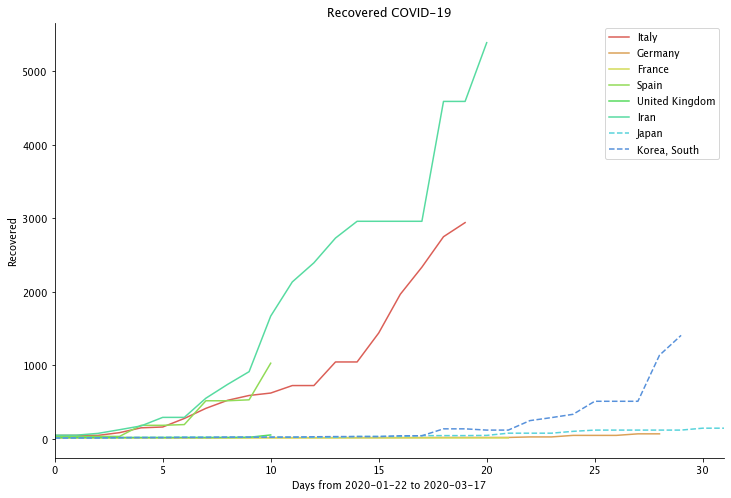

In [17]:
country_groups = [['Italy', 'Germany', 'France', 'Spain', 'United Kingdom', 'Iran'], 
                  ['Canada', 'Australia'], 
                  ['Japan', 'Korea, South'], 
                  ['Argentina', 'Brazil', 'Colombia', 'Mexico']]
line_styles = ['-', ':', '--', '-.']

sns.set_palette(sns.color_palette("hls", 12))
fig, ax = plt.subplots(figsize=(12, 8))

min_cases=10
for countries, ls in zip(country_groups, line_styles):
    plot_countries(df_recovered, countries, min_cases=min_cases, ls=ls)

ax.set(title='Recovered COVID-19',
       xlabel='Days from {} to {}'.format(min_date_string, max_date_string),
       ylabel='Recovered')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.legend(loc=0)

sns.despine();